# Support Vector Machine

## 先看一個簡單範例  比較 SVM 與 線性迴歸

In [32]:
data = data.frame(x=1:20,
                  y=c(3,4,8,2,6,10,12,13,15,14,17,18,20,17,21,22,25,30,29,31))


In [33]:
library(e1071)

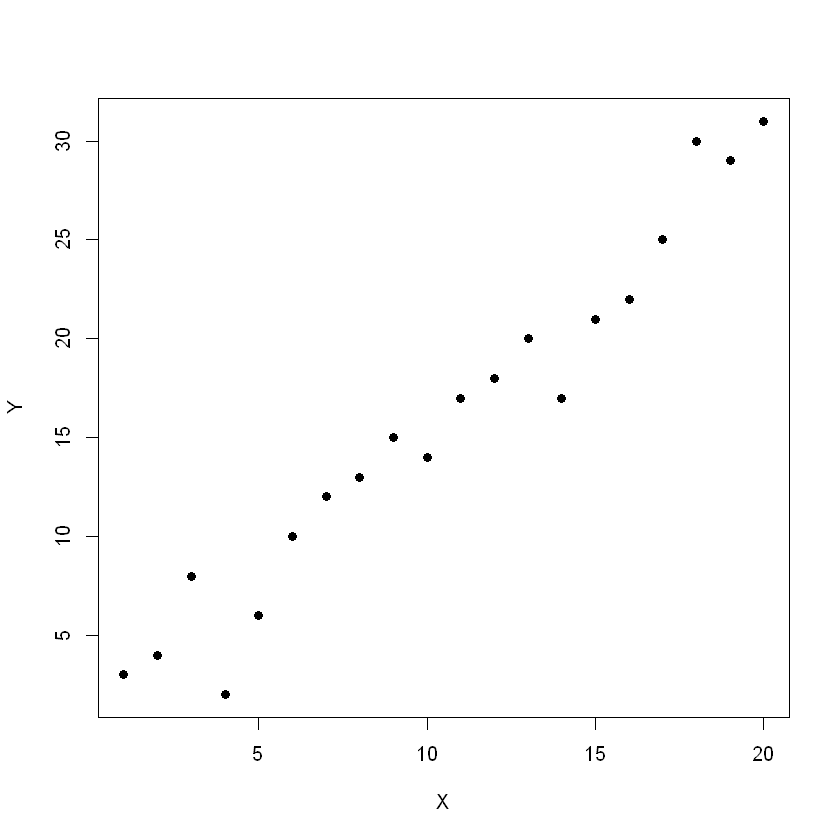

In [34]:
plot(data$x, data$y, pch=16, xlab="X", ylab="Y")

# 傳統線性回歸

In [35]:
model <- lm(y ~ x , data) 

In [36]:
lm.pred = predict(model, data)

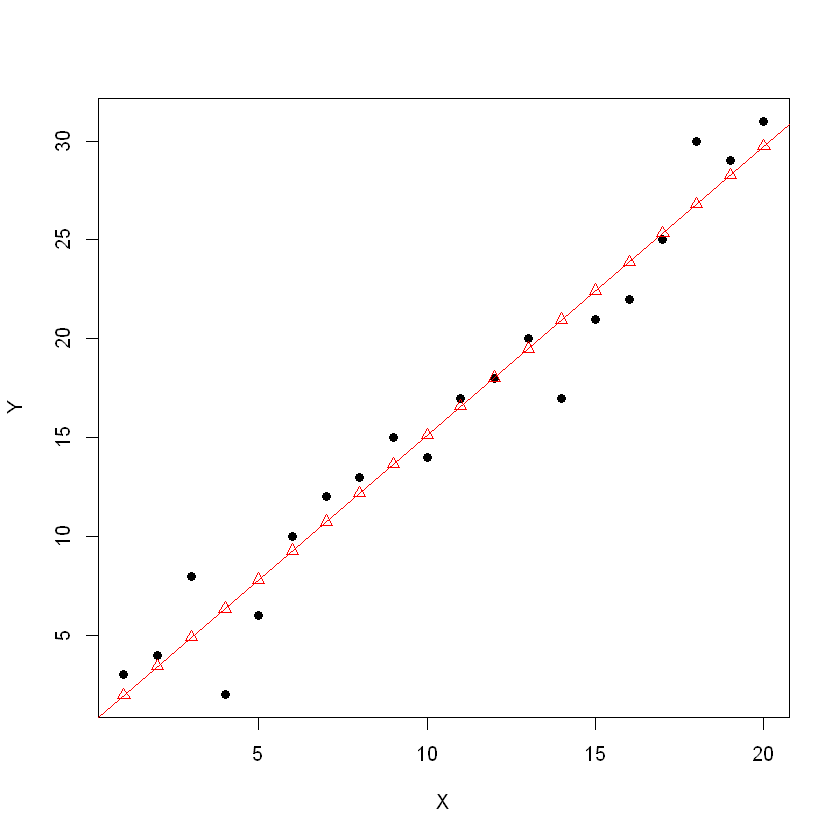

In [37]:
plot(data$x, data$y, pch=16, xlab="X", ylab="Y")
points(lm.pred, pch=2, col="red")
abline(model, col="red")

# 用SVM

In [38]:
model1 <- svm(y ~ x , data)

In [39]:
svm.pred = predict(model1, data)
svm.pred

1         2         3         4         5         6         7         8 
 5.226795  4.888098  5.171541  6.061420  7.448933  9.151831 10.953559 12.652793 
        9        10        11        12        13        14        15        16 
14.110860 15.284625 16.235589 17.110860 18.097667 19.360303 20.975879 22.890091 
       17        18        19        20 
24.911928 26.754779 28.113777 28.753422

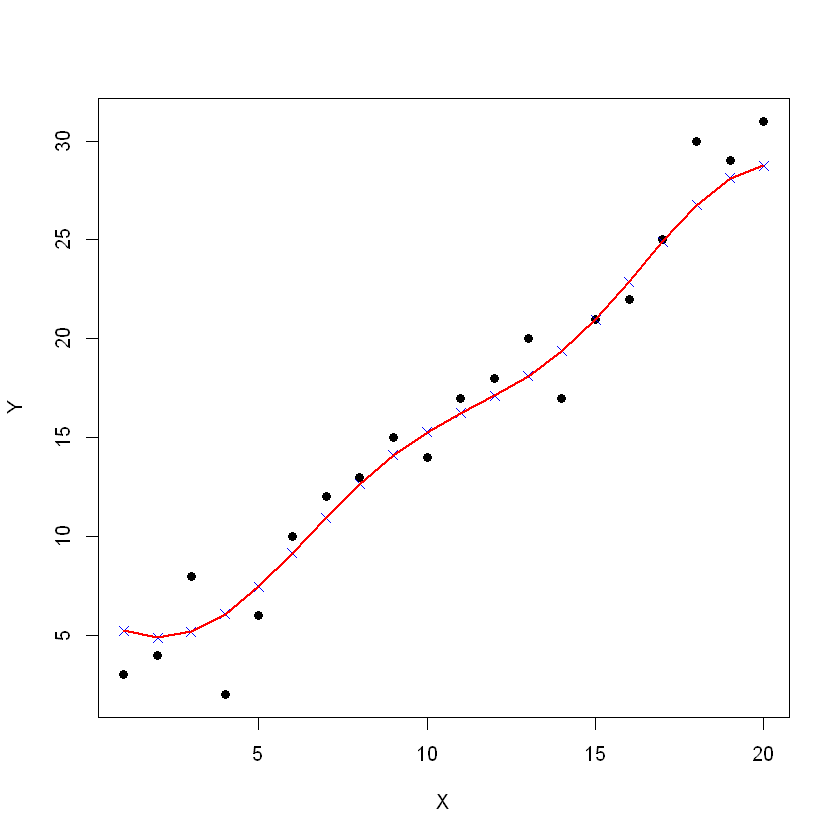

In [40]:
plot(data$x, data$y, pch=16,   xlab="X", ylab="Y")

points(svm.pred, pch=4, col="blue")
lines(data$x, svm.pred, col="red", lwd=2)

# 比較線性迴歸與SVM的差異

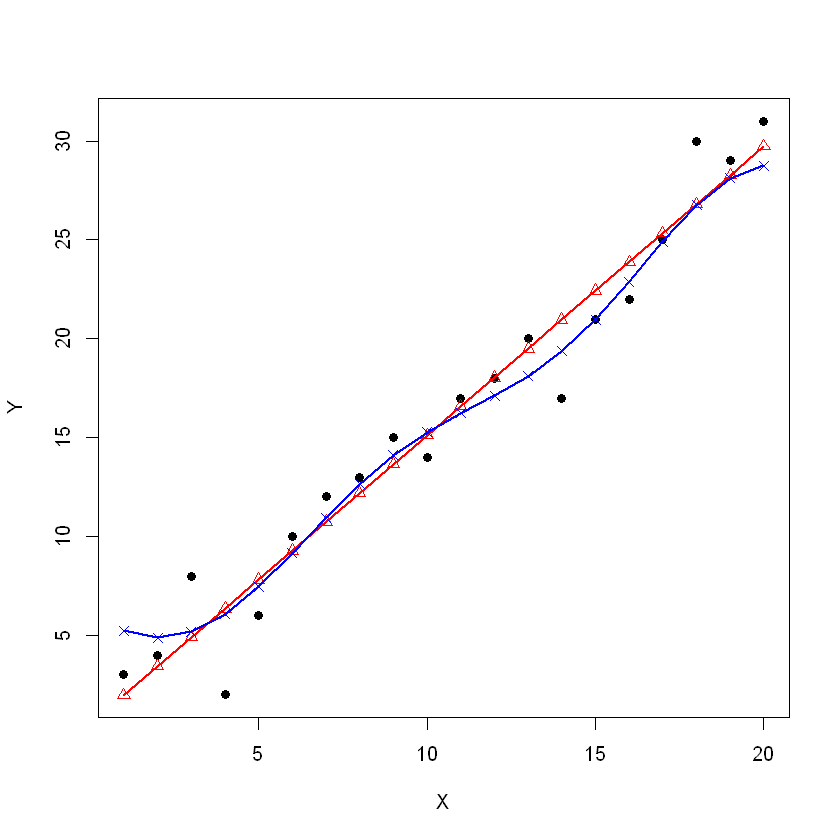

In [41]:
plot(data$x, data$y, pch=16, xlab="X", ylab="Y")
points(lm.pred, pch=2, col="red")
lines(data$x, lm.pred, col="red", lwd=2)
points(svm.pred, pch=4, col="blue")
lines(data$x, svm.pred, col="blue", lwd=2)

In [15]:
c(sqrt(mean((data$y - lm.pred)^2)),  sqrt(mean((data$y - svr.pred)^2)) )


[1] 1.914203 1.795094

In [42]:
install.packages("e1071")

Warning message:
"package 'e1071' is in use and will not be installed"

In [43]:
library("e1071")

In [44]:
case75 <- read.csv("c:/Rdata/p7.5.csv")
case75

price,area
229500,1850
273300,2190
247000,2100
195100,1930
261000,2300
179700,1710
168500,1550
234400,1920
168800,1840
180400,1720


## 依變數的型態是factor時，svm()會建立SVM的超平面，來處理分類問題
## 依變數的型態是numeric，svm()會轉為SVR，進行連續值的預測。

In [45]:
svm_model <- svm(price ~ area, data=case75)

In [46]:
summary(svm_model)


Call:
svm(formula = price ~ area, data = case75)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  1 
    epsilon:  0.1 


Number of Support Vectors:  13






In [47]:
svm.pred <- predict(svm_model, case75)
svm.pred

1        2        3        4        5        6        7        8 
193659.1 255613.1 241772.0 208651.7 265244.8 175380.8 179398.1 206693.4 
       9       10       11       12       13       14       15 
191932.7 176131.5 173350.9 265489.3 182469.0 228589.9 261106.5

In [83]:
x1 = cbind (case75$area , svm.pred)
colnames(x1) <- c("area", "svm.pred")
x1 = x1[order(x1[,1]),]
x1

,area,svm.pred
13,1525,182469.0
7,1550,179398.1
11,1660,173350.9
6,1710,175380.8
10,1720,176131.5
9,1840,191932.7
1,1850,193659.1
8,1920,206693.4
4,1930,208651.7
14,2030,228589.9


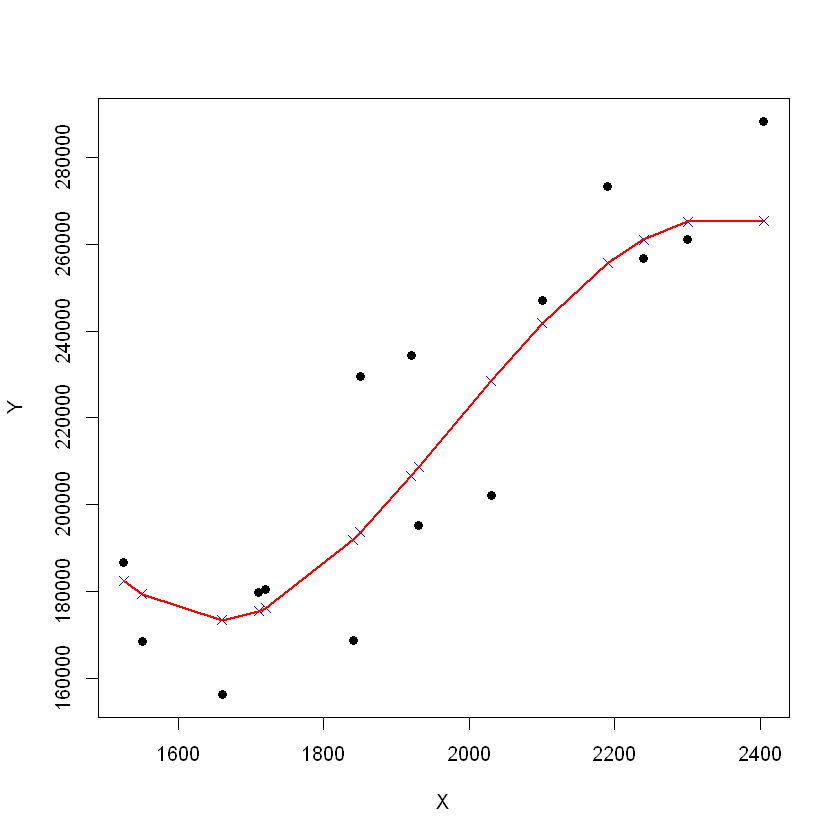

In [84]:
plot(case75$area, case75$price, pch=16,   xlab="X", ylab="Y")
points(x = case75$area, y = svm.pred, pch=4, col="blue")
#lines( sort(case75$area), sort(svm.pred), col="red", lwd=2)
lines( x1[,1], x1[,2], col="red", lwd=2)
